<a href="https://www.kaggle.com/code/jooartursilveira/homicide-suicide-rate-and-gdp-eda?scriptVersionId=91292807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Crime and GPD rate EDA
Hello there! For this analysis, I'll use the [Homicide rate, Suicide rate and GDP](https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp). Let's explore the data and hopefully find some insights. Feel free to comment and sugest improvements on the code, analysis methods and the notebook itself.


* [1. Intro](#begin)
* [2. World](#World)
* [3. Regions](#Regions)
    - [3.1 South Asia](#South-Asia)
    - [3.2 Europe and Central Asia](#Europe-and-Central-Asia)
    - [3.3 Middle East and North-Africa](#Middle-East-and-North-Africa)
    - [3.4 Sub-Saharan Africa](#Sub-Saharan-Africa)
    - [3.5 Latin America and Caribbean](#Latin-America-and-Caribbean)
    - [3.6 East Asia and Pacific](#East-Asia-and-Pacific)
* [4. Countries](#Countries)

<a id="begin"></a>
# Intro

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/homicide-suicide-rate-and-gdp/suicide homicide gdp.csv', sep=',', decimal='.')
print(df.shape)
df.head()

(13566, 10)


,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   iso3c                                            13464 non-null  object 
 2   iso2c                                            13413 non-null  object 
 3   year                                             13566 non-null  int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 6   GDP (current US$)                                11396 non-null  float64
 7   GDP per capita, PPP (current international $)    7238 non-null   float64
 8   adminregion                                      6987 non-null   object 
 9   incomeLevel                 

In [4]:
df.isnull().sum()

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

We have a bunch of missing values here. I'm not actually sure how to get around this besides dropping them. <br/>
It's evident this is a time dataset, with the year being the independent variable.
Maybe some line plots will be useful to get some insights. <br/>
So, let's plot the 'Intentional homicides (per 100,000 people)', 'Suicide mortality rate (per 100,000 population)','GDP (current US)', and 'GDP per capita, PPP (current international)' evolution throughout the years. 

In [5]:
df_nonull = df.dropna()

In [6]:
variables = ['Intentional homicides (per 100,000 people)','Suicide mortality rate (per 100,000 population)',
 'GDP (current US$)','GDP per capita, PPP (current international $)']

# World

In [7]:
def plot_crime_gdp_rates(df, y_variables, title=''):
    plt.figure(figsize=(20,10))
    for i, y in enumerate(y_variables):
        axi = plt.subplot(2, 2, i+1)
        sns.lineplot(ax=axi, data=df, x='year', y=y)
        axi.set_ylabel(y)
        axi.set_title(title)

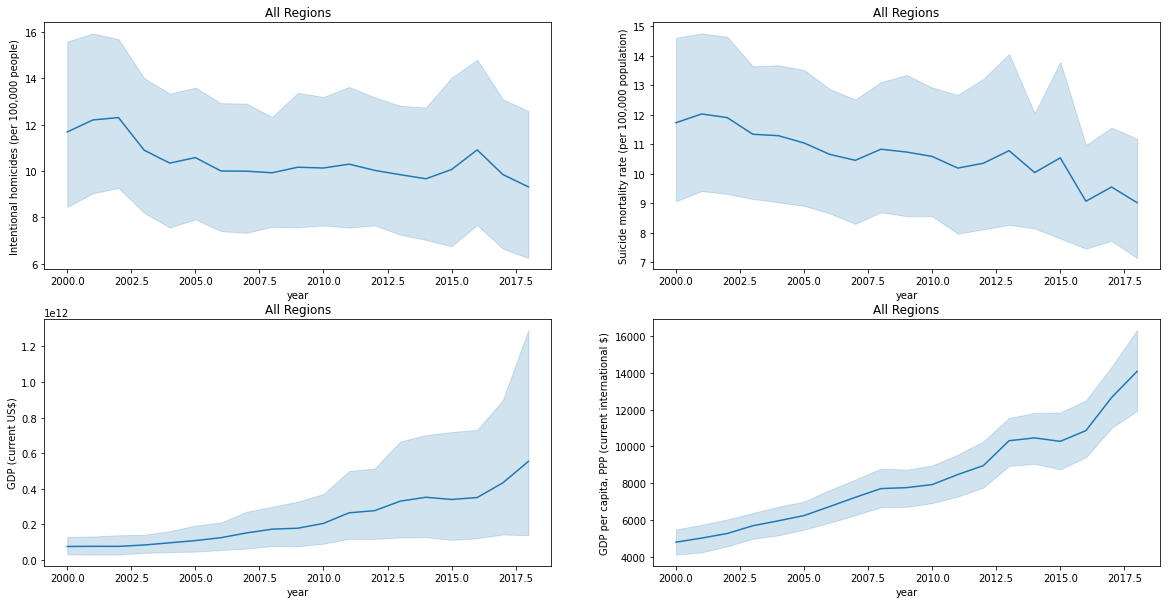

In [8]:
dfi = df_nonull
title = 'All Regions'
plot_crime_gdp_rates(dfi, variables, title)

In [9]:
dfi.set_index('year').corr()

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,0.072307,-0.044104,0.006821
"Suicide mortality rate (per 100,000 population)",0.072307,1.000000,0.004226,0.093090
GDP (current US$),-0.044104,0.004226,1.000000,0.178289
"GDP per capita, PPP (current international $)",0.006821,0.093090,0.178289,1.000000


Now, let's analyse the plots and write down some observations:
* Graphically, looks like the intentional homicides and suicide mortality rates tend to drop as the GDP and GDP per capita increases.
* Analysing the correlation matrix, it looks like the variables don't correlate that much with each other. <br/>

# Regions
Well, the dataset is composed of different regions and contries, maybe we'll find something more precise drilling it down. So, let's go into each region.

In [10]:
dfs_region = [df_nonull.loc[df_nonull['adminregion']==r, :] for r in df_nonull['adminregion'].unique()]

## South Asia

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,0.379652,0.006881,-0.307445
"Suicide mortality rate (per 100,000 population)",0.379652,1.000000,0.359469,0.050234
GDP (current US$),0.006881,0.359469,1.000000,-0.036105
"GDP per capita, PPP (current international $)",-0.307445,0.050234,-0.036105,1.000000


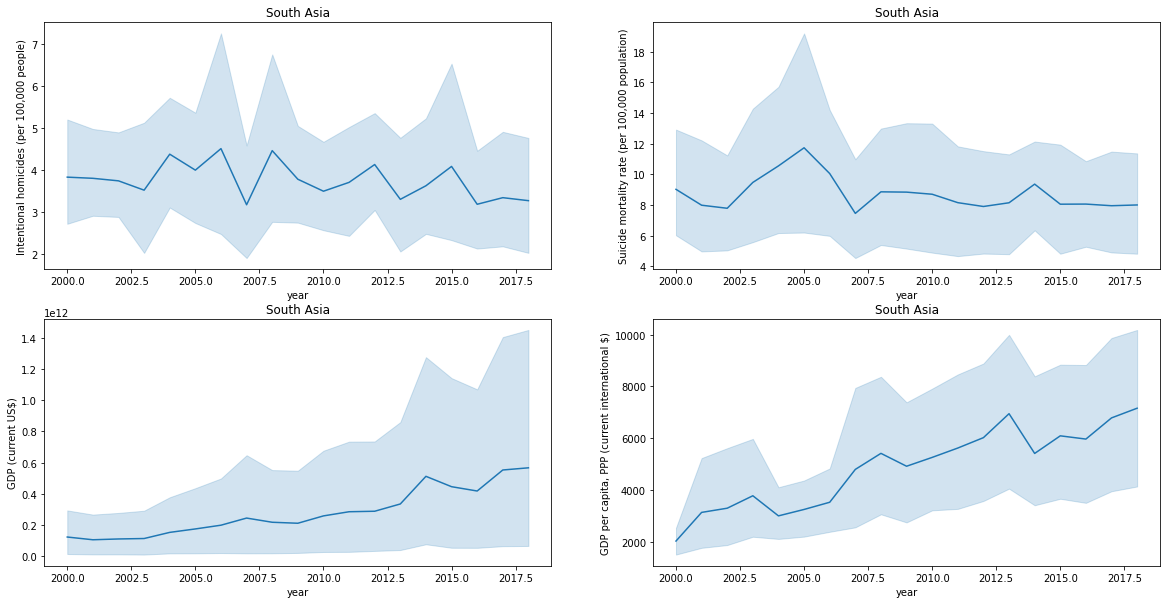

In [11]:
dfi = dfs_region[0]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

## Europe and Central Asia

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,0.702604,0.372561,-0.057624
"Suicide mortality rate (per 100,000 population)",0.702604,1.000000,0.309259,0.190921
GDP (current US$),0.372561,0.309259,1.000000,0.546795
"GDP per capita, PPP (current international $)",-0.057624,0.190921,0.546795,1.000000


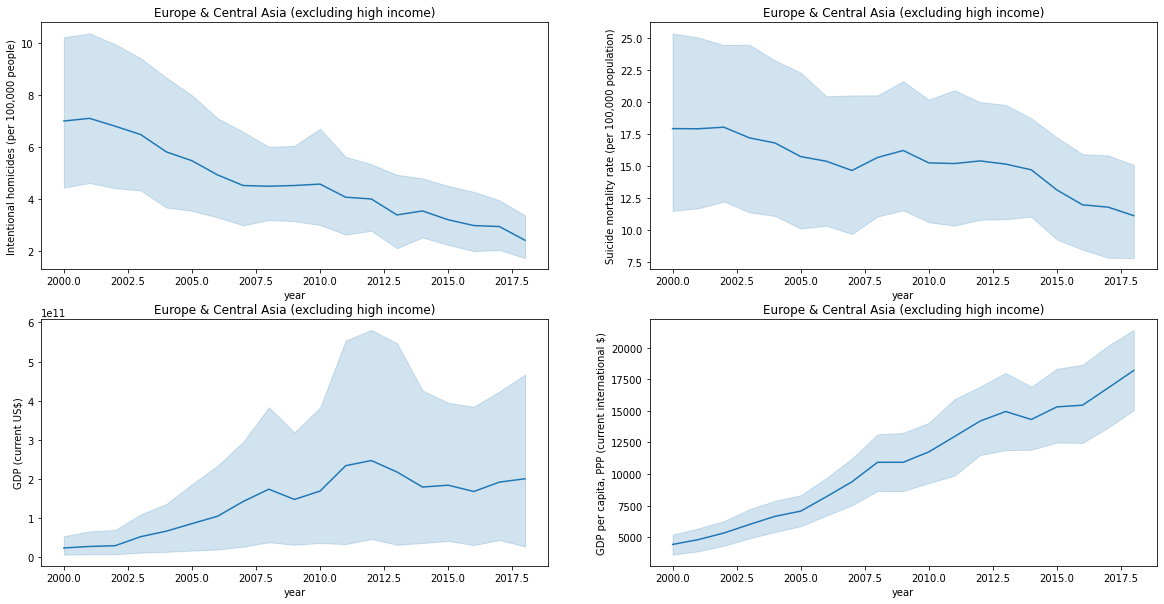

In [12]:
dfi = dfs_region[1]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

## Middle East and North-Africa

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,-0.040955,0.044335,0.142608
"Suicide mortality rate (per 100,000 population)",-0.040955,1.000000,0.068296,-0.537997
GDP (current US$),0.044335,0.068296,1.000000,0.478749
"GDP per capita, PPP (current international $)",0.142608,-0.537997,0.478749,1.000000


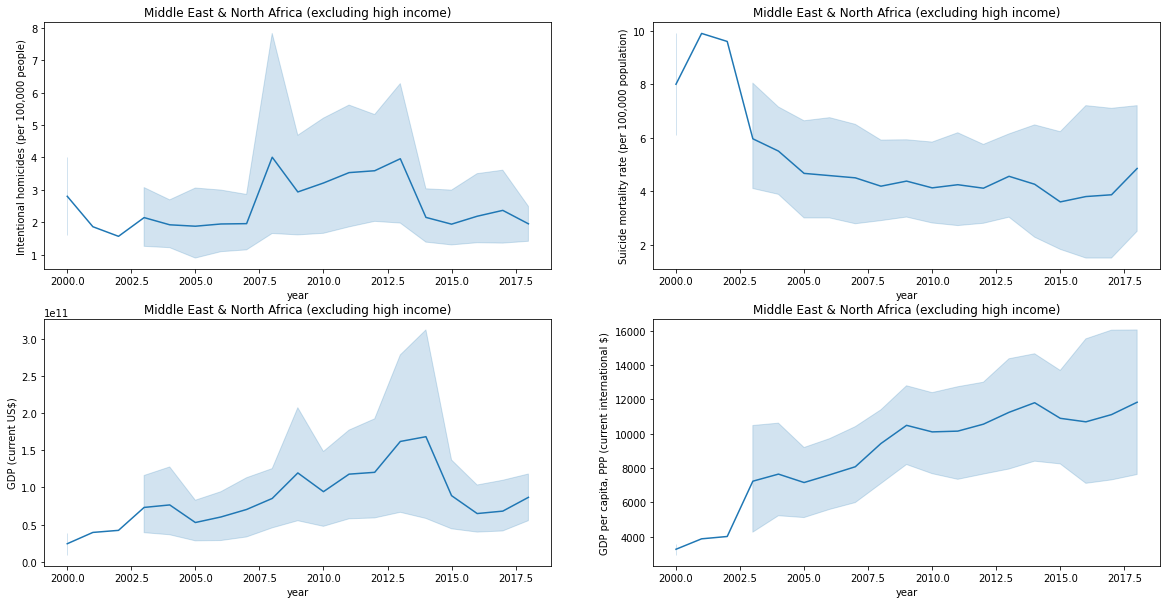

In [13]:
dfi = dfs_region[2]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

## Sub-Saharan Africa

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,0.662552,0.614861,0.343856
"Suicide mortality rate (per 100,000 population)",0.662552,1.000000,0.093125,0.256127
GDP (current US$),0.614861,0.093125,1.000000,0.428822
"GDP per capita, PPP (current international $)",0.343856,0.256127,0.428822,1.000000


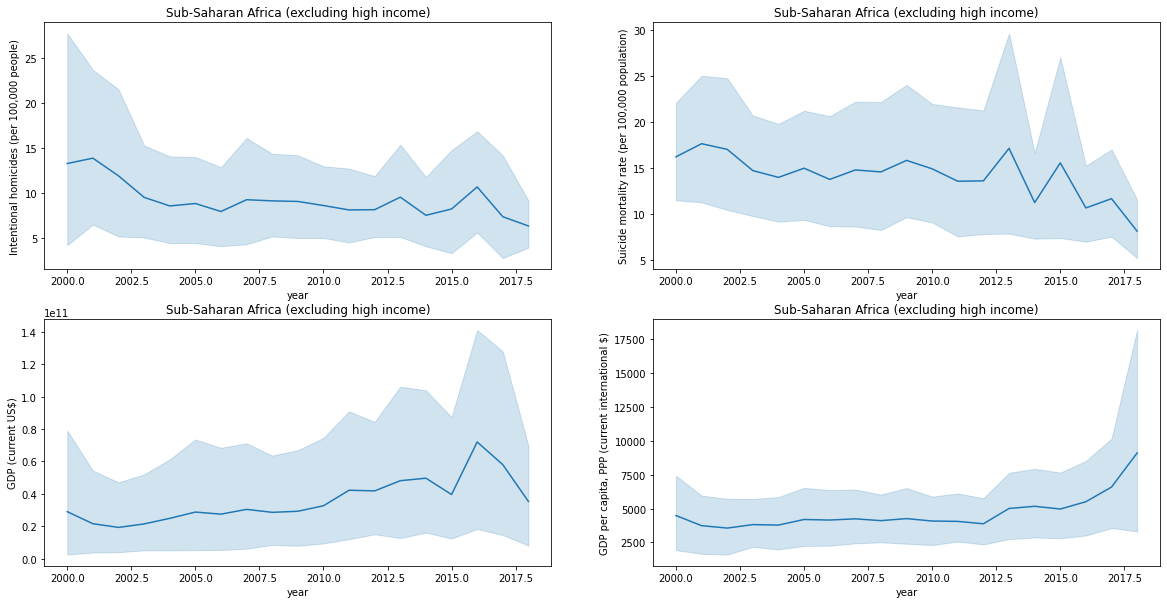

In [14]:
dfi = dfs_region[3]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

## Latin America and Caribbean

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,-0.193640,-0.045594,-0.353009
"Suicide mortality rate (per 100,000 population)",-0.193640,1.000000,-0.114042,0.017598
GDP (current US$),-0.045594,-0.114042,1.000000,0.391253
"GDP per capita, PPP (current international $)",-0.353009,0.017598,0.391253,1.000000


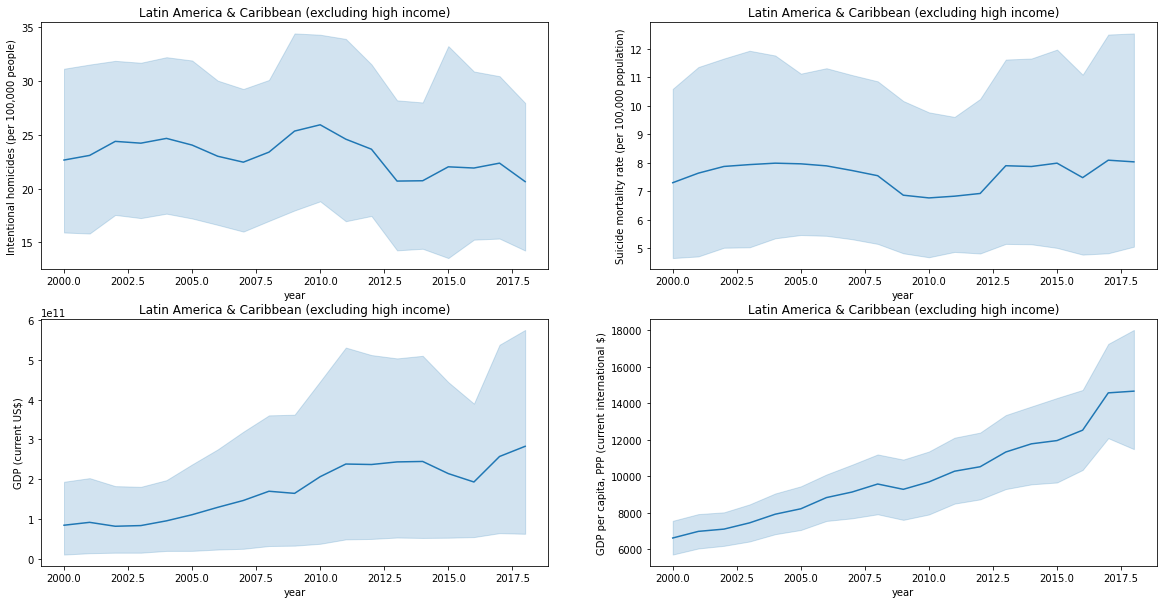

In [15]:
dfi = dfs_region[4]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

## East Asia and Pacific

,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
"Intentional homicides (per 100,000 people)",1.000000,0.282238,-0.294543,-0.143847
"Suicide mortality rate (per 100,000 population)",0.282238,1.000000,0.018662,-0.017274
GDP (current US$),-0.294543,0.018662,1.000000,0.287979
"GDP per capita, PPP (current international $)",-0.143847,-0.017274,0.287979,1.000000


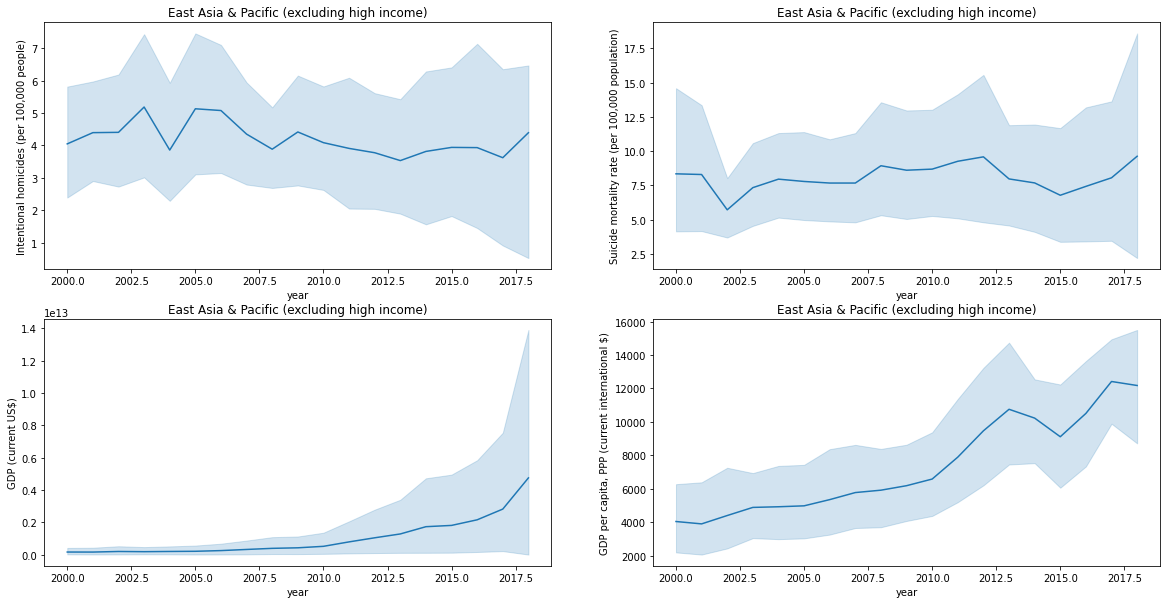

In [16]:
dfi = dfs_region[5]
title = dfi.loc[:, 'adminregion'].unique()[0]
plot_crime_gdp_rates(dfi, variables, title)
dfi.set_index('year').corr()

Now, let's analyse the plots and write down some observations:
* As already notice, the intentional homicides and suicide mortality rate tends to drop as the GDP and GDP per capita increases.
* The GDP per capita seems to have a stronger correlation with the drops in crime rates compared to GPD.
* Overall, this behavior was observed across all regions. 

I suppose it's somewhat of a comum sense that more people making money, the life quality tends to get better, especially as the crime rate tends to drop on richer geografic places. However, this can be a bit tricky, because the GPD per capita seems to be a stronger force in this trend. Maybe it doesn't matter that much a region getting richer without more and more people participating in the wealth increase process.

# Countries

In [17]:
countries = df_nonull['country'].unique()
print(len(countries))
countries

107


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'China',
       'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji',
       'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lebanon', 'Lesotho',
       'Liberia', 'Malawi', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'North Macedonia', 'Pakistan', 'P

I suppose the analysis would be good enough, however I wanted to look even further to see how each country would behave. There's 107 countries in the dataset, so I trimmed down the variables names and used some simple python magic to create a dictionary where the key is the country's name and the value is the correlation matrix.

In [18]:
df_nonull.set_index('year', inplace=True)

In [19]:
dict_rename = {'Intentional homicides (per 100,000 people)': 'IM',
               'Suicide mortality rate (per 100,000 population)': 'SM',
               'GDP (current US$)': 'GDP',
               'GDP per capita, PPP (current international $)': 'GDPper'}
df_nonull.rename(columns=dict_rename, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
dict_corr = {c: df_nonull.loc[df_nonull['country']==c, :].corr() for c in df_nonull['country'].unique()}

I defined a simple function which takes a country name and the dictionary with all correlations to plot said country's heatmap. <br/>
I ploted some countries already, but feel free to mess around with the function. <br/>
Also, we can see that some countries, like Romania, the correlation between crime rates (IM and SM) and GPDs are indeed negative, below -0.7 <br/>
That's it, everybody. Feel free to comment and sugest improvements on the code, analysis methods and the notebook itself.

In [21]:
def plot_country_heatmap(country, correlation=dict_corr):
    df_corr = correlation.get(country)
    ax = sns.heatmap(df_corr, fmt='.3f', annot=True, cmap='Blues', annot_kws={'fontsize': 15})
    ax.set_title(country)

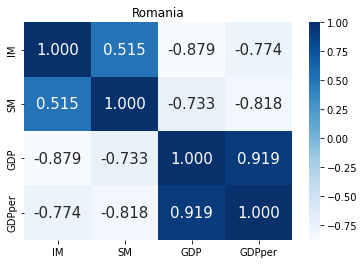

In [22]:
plot_country_heatmap('Romania', correlation=dict_corr)

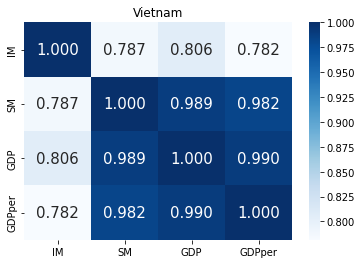

In [23]:
plot_country_heatmap('Vietnam', correlation=dict_corr)

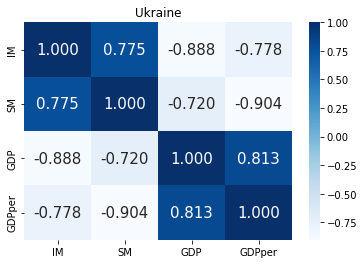

In [24]:
plot_country_heatmap('Ukraine', correlation=dict_corr)

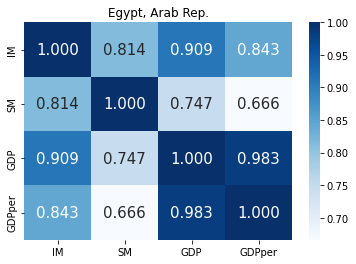

In [25]:
plot_country_heatmap('Egypt, Arab Rep.', correlation=dict_corr)

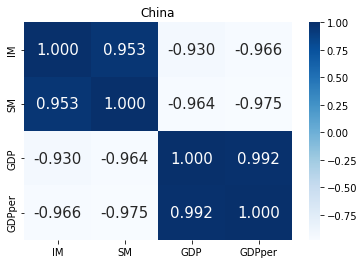

In [26]:
plot_country_heatmap('China', correlation=dict_corr)

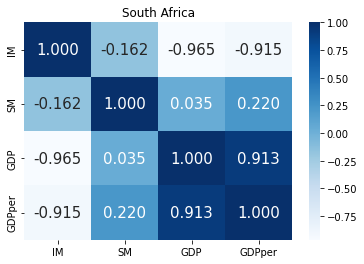

In [27]:
plot_country_heatmap('South Africa', correlation=dict_corr)

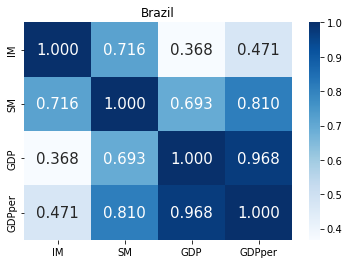

In [28]:
plot_country_heatmap('Brazil', correlation=dict_corr)

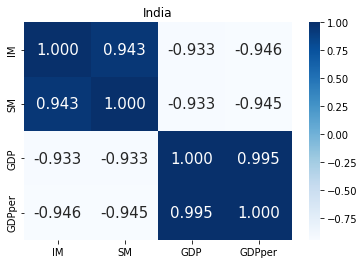

In [29]:
plot_country_heatmap('India', correlation=dict_corr)